<a href="https://colab.research.google.com/github/cuzmyk/machine_learning/blob/main/2s_2pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
target = raw_df.values[1::2, 2]

# Имена переменных
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
y = target
# Создание DataFrame X с указанными именами столбцов
X = pd.DataFrame(data, columns=column_names)

# Вывод первых строк DataFrame X
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1.2. Проектируем архитектуру для этой задачи

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(28, input_shape=(14,), activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 28)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              29 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [14]:
# Ваш код
model.compile(optimizer='sgd', loss='mse')

#### 1.4. Обучаем модель ИНС

In [15]:
# Ваш код
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 14), (102, 14))

In [16]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 775.3978
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 599.8162 
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 580.6217 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 587.3864 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 586.0185 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 599.9137 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 609.8984 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 604.1380 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 633.2329 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 615.4998 


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()  # Масштабирование в диапазон 0-1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Сохранение модели scaler
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
X_train

array([[0.00395381, 0.        , 0.21041056, ..., 0.98688789, 0.22638298,
        0.48222222],
       [0.00171339, 0.        , 0.37939883, ..., 0.94966968, 0.23120567,
        0.37111111],
       [0.00120232, 0.3       , 0.1638563 , ..., 0.98575319, 0.27375887,
        0.37777778],
       ...,
       [0.00162594, 0.        , 0.35007331, ..., 0.99397347, 0.24312057,
        0.31555556],
       [0.0025059 , 0.        , 0.23643695, ..., 0.98951031, 0.48425532,
        0.25777778],
       [0.00149286, 0.        , 0.13159824, ..., 1.        , 0.36765957,
        0.40222222]])

In [18]:
model = Sequential([
    Dense(28, input_shape=(14,), activation='relu'),
    Dense(14, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='sgd', loss='mse')

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 570.8698 - val_loss: 425.6631
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 388.0672 - val_loss: 82.0124
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 146.6697 - val_loss: 72.1166
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 72.2891 - val_loss: 38.4014
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 28.9208 - val_loss: 26.0606
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.9724 - val_loss: 145.2517
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 95.3950 - val_loss: 60.5396
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33.8195 - val_loss: 30.9933
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.7861 - val_loss: 30.5737
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.6438 - val_loss: 17.0746
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.2608 - val_loss: 12.7360
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

#### 1.6. Делаем предсказания на тестовых данных

In [19]:
# Ваш код
preds = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [20]:
# Ваш код
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

2.209284591674805

#### 1.8. Строим график обучения

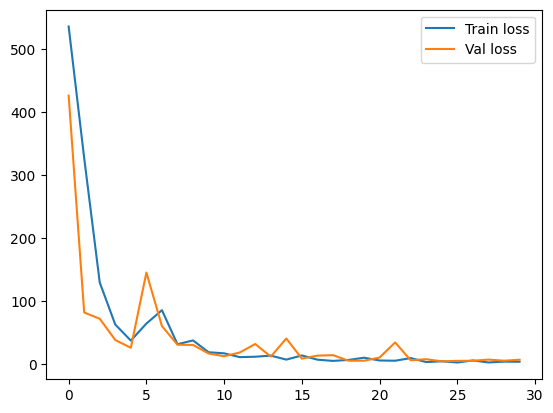

In [21]:
# Ваш код
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [22]:
# Ваш код
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.3 MB/s eta 0:00:00


#### 2. Проверка обученной модели пользовательскими данными

In [23]:
def preprocess_input(features, scale_model="scaler.pkl"):
# Функция преобразует входные данные в формат, подходящий для модели машинного обучения.
# Args: features: Список или массив с входными признаками.
# scale_model: Путь к файлу с сохраненной моделью масштабирования.
# Returns: Преобразованный массив признаков.
  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [24]:
def predict_price(*features):

  """
  Функция прогнозирует цену на основе предобработанных
  входных признаков.

  Args:
      features: Список или массив с входными признаками.

  Returns:
      Прогнозируемая цена (в долларах).
  """

  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

In [27]:
import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="CRIM", minimum=0, maximum=89, step=0.1, value=8.3252),
        gr.Slider(label="ZN", minimum=0, maximum=100, step=1, value=41.0),
        gr.Slider(label="INDUS", minimum=0.46, maximum=27.74, step=0.01, value=6.984127),
        gr.Slider(label="CHAS", minimum=0, maximum=1, step=0.01, value=0.2),
        gr.Slider(label="NOX", minimum=0.38, maximum=0.87, step=0.01, value=0.5),
        gr.Slider(label="RM", minimum=3, maximum=9, step=0.1, value=6),
        gr.Slider(label="AGE", minimum=2.9, maximum=100, step=0.1, value=37.88),
        gr.Slider(label="DIS", minimum=1.2, maximum=12.12, step=0.1, value=2),
        gr.Slider(label="RAD", minimum=1, maximum=24, step=0.1, value=12),
        gr.Slider(label="TAX", minimum=187, maximum=711, step=1, value=300),
        gr.Slider(label="PTRATIO", minimum=12.6, maximum=22, step=0.1, value=15),
        gr.Slider(label="B", minimum=0.32, maximum=396.9, step=0.1, value=130),
        gr.Slider(label="LSTAT", minimum=1.73, maximum=37.97, step=0.1, value=22),
        gr.Slider(label="MEDV", minimum=5, maximum=50, step=0.1, value=13),
    ],
    outputs=gr.Text(label="Predicted Price ($)"),
    live=False,
)

# Запуск интерфейса
interface.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f60834ccd916b042c2.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ae68214f4b3b616712.gradio.live
Killing tunnel 127.0.0.1:7861 <> https://f60834ccd916b042c2.gradio.live


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
import os
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [ ]:
# Ваш код
# импортируем бэкенд Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
%%capture
DATADIR = 'Dataset'
if os.path.isdir(DATADIR)>0:
    print ('Data directory already exists and it is not empty, miss downloading')
else:
    print ('Data directory does not exists or it is empty, download the dataset')
    !gdown --id 1SaAEAxiqU4sSXsFEja1JRARpXCGQIkJN #Скопировать ID из ссылки в гугл диске
    !unzip Dataset.zip

In [ ]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 3. Указываем путь к набору данных:

In [ ]:
# Ваш код
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/content/vegetables")))
print(imagePaths[700].split(os.path.sep)[-2])
random.shuffle(imagePaths)

apple


### 4. Загружаем набор данных и формируем общую выборку:

In [ ]:
# Ваш код
# цикл по изображениям
for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten() # меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
																								# а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [ ]:
# Ваш код
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [ ]:
# Ваш код
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [ ]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [ ]:
# Ваш код
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [ ]:
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.01
EPOCHS = 80

#### 5.3. Компилируем модель:

In [ ]:
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

#### 6.2. Запустим процесс обучения модели:

In [ ]:
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=EPOCHS, batch_size=100, callbacks=[early_stopping, checkpoint])

Epoch 1/80
25/25 [==============================] - 1s 16ms/step - loss: 0.7010 - accuracy: 0.7333 - val_loss: 0.3442 - val_accuracy: 0.9118
Epoch 2/80
13/25 [==============>...............] - ETA: 0s - loss: 0.3267 - accuracy: 0.9092

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


25/25 [==============================] - 0s 7ms/step - loss: 0.3047 - accuracy: 0.9129 - val_loss: 0.2844 - val_accuracy: 0.9044
Epoch 3/80
25/25 [==============================] - 0s 6ms/step - loss: 0.2562 - accuracy: 0.9190 - val_loss: 0.2590 - val_accuracy: 0.9020
Epoch 4/80
25/25 [==============================] - 0s 11ms/step - loss: 0.2318 - accuracy: 0.9243 - val_loss: 0.2365 - val_accuracy: 0.9154
Epoch 5/80
25/25 [==============================] - 0s 9ms/step - loss: 0.2156 - accuracy: 0.9243 - val_loss: 0.2264 - val_accuracy: 0.9179
Epoch 6/80
25/25 [==============================] - 0s 8ms/step - loss: 0.2029 - accuracy: 0.9272 - val_loss: 0.2434 - val_accuracy: 0.8995
Epoch 7/80
25/25 [==============================] - 0s 9ms/step - loss: 0.1888 - accuracy: 0.9333 - val_loss: 0.2111 - val_accuracy: 0.9216
Epoch 8/80
25/25 [==============================] - 0s 6ms/step - loss: 0.1826 - accuracy: 0.9374 - val_loss: 0.2576 - val_accuracy: 0.8934
Epoch 9/80
25/25 [============

#### 6.3. Загружаем лучшую модель:

In [ ]:
# Ваш код
from keras.models import load_model

model = load_model("/content/best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [ ]:
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=45)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
19/19 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

       apple       0.90      0.98      0.94       279
       lemon       0.97      1.00      0.98       287
      tomato       0.99      0.86      0.92       250

    accuracy                           0.95       816
   macro avg       0.95      0.94      0.95       816
weighted avg       0.95      0.95      0.95       816



#### 7.2. Выведем матрицу ошибок

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(testX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = testY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

26/26 [==============================] - 0s 2ms/step


26/26 [==============================] - 0s 2ms/step


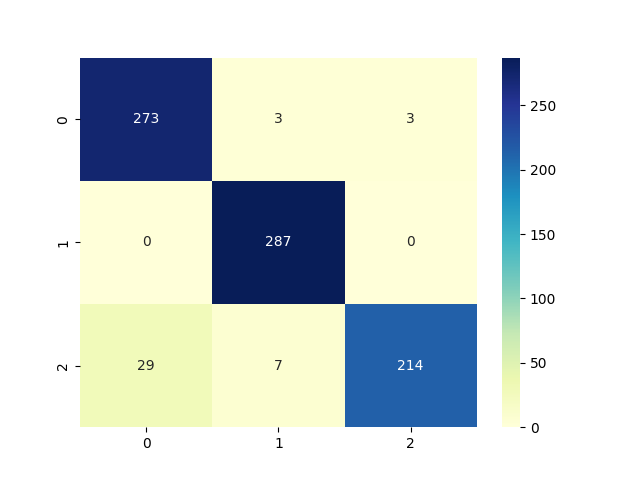

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure()
# Получим прогнозы по валидационным даннным
Y_pred = model.predict(testX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = testY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.savefig('plot1.png')
cv2_imshow(cv2.imread("plot1.png"))
#plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]


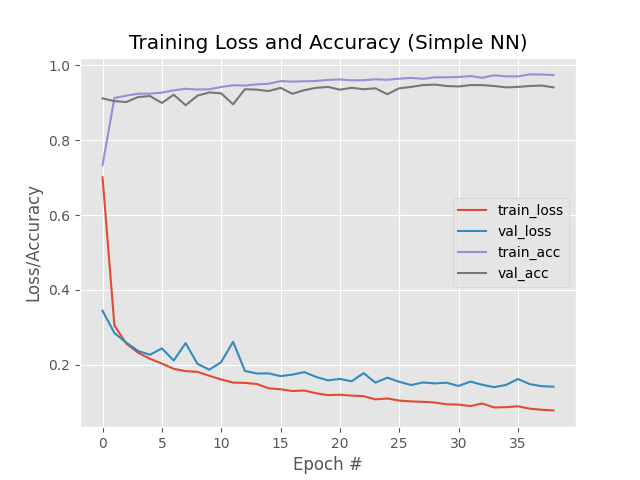

In [ ]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
print(N)
plt.style.use("ggplot")
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(H.history["loss"], label="train_loss")
plt.plot(H.history["val_loss"], label="val_loss")
plt.plot(H.history["accuracy"], label="train_acc")
plt.plot(H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

#### 7.3. Отобразим график обучения

### 8. Сохранение модели и меток классов:

In [ ]:
# Ваш код
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [ ]:
model_path = "model.h5"
labels_path = "label_bin"

save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [ ]:
# Ваш код
!pip install gradio

In [ ]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [ ]:
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 32):

    image = img.copy()  # Создаем копию изображения
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [ ]:
def predict_image(img, preprocess_func = preprocess_image, model_path = "model.h5", label_path = "label_bin"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/drive/MyDrive/content/vegetables/lemon/lemon_1.jpg",
              "/content/drive/MyDrive/content/vegetables/tomato/tomato_0926.jpeg",
              "/content/drive/MyDrive/content/vegetables/apple/apple_0556.jpg"])

# Запускаем интерфейс
interface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://5c45d7ca6c33c5ef93.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


(300, 300, 3)
(300, 300, 3)
(32, 32, 3)
(3072,)
(1, 3072)
1/1 [==============================] - 0s 47ms/step
(225, 225, 3)
(225, 225, 3)
(32, 32, 3)
(3072,)
(1, 3072)
1/1 [==============================] - 0s 48ms/step
(417, 626, 3)
(417, 626, 3)
(32, 32, 3)
(3072,)
(1, 3072)
1/1 [==============================] - 0s 44ms/step
(225, 225, 3)
(225, 225, 3)
(32, 32, 3)
(3072,)
(1, 3072)
1/1 [==============================] - 0s 45ms/step
(300, 300, 3)
(300, 300, 3)
(32, 32, 3)
(3072,)
(1, 3072)
1/1 [==============================] - 0s 117ms/step
(320, 427, 3)
(320, 427, 3)
(32, 32, 3)
(3072,)
(1, 3072)
1/1 [==============================] - 0s 45ms/step
(1200, 1163, 3)
(1200, 1163, 3)
(32, 32, 3)
(3072,)
(1, 3072)
1/1 [==============================] - 0s 47ms/step
(540, 720, 3)
(540, 720, 3)
(32, 32, 3)
(3072,)
(1, 3072)
1/1 [==============================] - 0s 47ms/step
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7864 <> https://5c45d7ca6c33c5ef93